In [4]:
# importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os
import numpy as np
from PIL import Image

In [5]:
# ruta de imágenes
path = "C:/Users/ruben/Desktop/Prueba Final/dataset"

In [6]:
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

In [7]:
# Obtener la cantidad de archivos en cada carpeta
total_train = sum([len(files) for _, _, files in os.walk(train_dir)])
total_test = sum([len(files) for _, _, files in os.walk(test_dir)])
print("{} imágenes para training.".format(total_train))
print("{} imágenes para testing.".format(total_test))

1633 imágenes para training.
810 imágenes para testing.


In [8]:
# Obtener las clases de imágenes y ordenarlos alfabéticamente
class_names = sorted([dI for dI in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, dI))])
print("Nombres CLASS:", class_names)

Nombres CLASS: ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [9]:
# Establecer parámetros para preprocesamiento y entrenamiento
# Tamaño de imágenes
batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
# Generar datos de training y testing
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='training'
)
validation_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='validation'
)
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False
)

Found 1310 images belonging to 8 classes.
Found 323 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [11]:
# Crear el modelo CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Imprimir el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               43655296  
                                                        

In [13]:
# Establecer el número de epochs
epochs = 10
# Entrenar al modelo
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=validation_data_gen
)

Epoch 1/10
41/41 [==============================] - 70s 2s/step - loss: -500107.6875 - accuracy: 0.0382 - val_loss: -2687803.7500 - val_accuracy: 0.0372
Epoch 2/10
41/41 [==============================] - 69s 2s/step - loss: -21743376.0000 - accuracy: 0.0382 - val_loss: -66405276.0000 - val_accuracy: 0.0372
Epoch 3/10
41/41 [==============================] - 69s 2s/step - loss: -216213952.0000 - accuracy: 0.0382 - val_loss: -476894976.0000 - val_accuracy: 0.0372
Epoch 4/10
41/41 [==============================] - 69s 2s/step - loss: -1068092096.0000 - accuracy: 0.0382 - val_loss: -1920047104.0000 - val_accuracy: 0.0372
Epoch 5/10
41/41 [==============================] - 69s 2s/step - loss: -3461239808.0000 - accuracy: 0.0382 - val_loss: -5542313984.0000 - val_accuracy: 0.0372
Epoch 6/10
41/41 [==============================] - 69s 2s/step - loss: -8855810048.0000 - accuracy: 0.0382 - val_loss: -13059878912.0000 - val_accuracy: 0.0372
Epoch 7/10
41/41 [==============================] - 

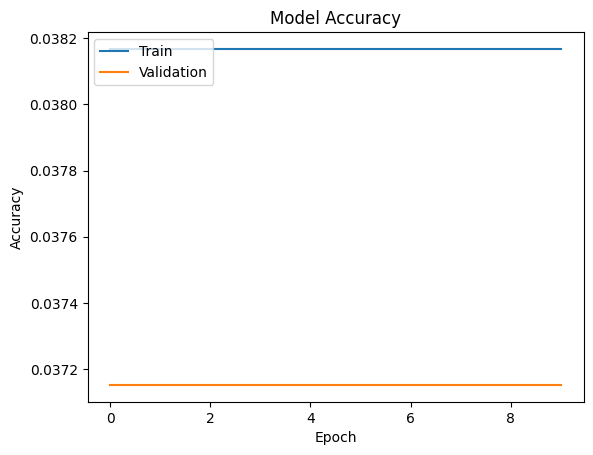

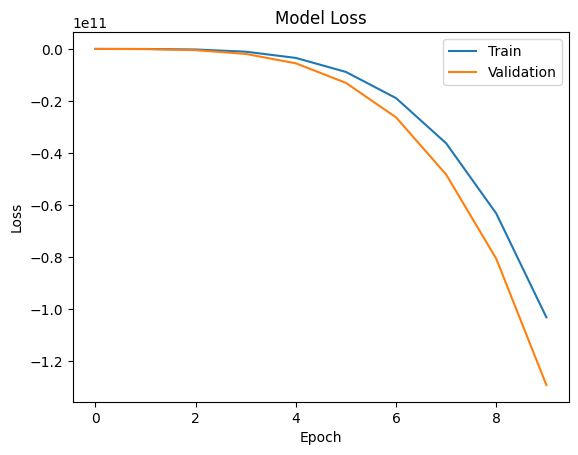

In [14]:
import matplotlib.pyplot as plt
# aquí trazando el train y la precisión de validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Trazando la pérdida del entrenamiento y validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [15]:
# Evaluar el modelo en el conjunto de datos de test
model.evaluate(test_data_gen, verbose=1)

26/26 [==============================] - 9s 329ms/step - loss: -130769108992.0000 - accuracy: 0.0593


[-130769108992.0, 0.05925925821065903]

# Predecir este modelo con todas las imágenes de test

In [16]:
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(test_dir, class_name)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(folder_path, file)
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
                input_arr = np.expand_dims(input_arr, axis=0)
                predictions = model.predict(input_arr)
                score = predictions[0][0]
                print("La imagen {} se predice como {} con {:.2f}% de precisión.".format(file_path, class_name, 100 * score))

1/1 [==============================] - 0s 140ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_01\14-CAPTURE_20220523_141530_080.png se predice como CLASS_01 con 100.00% de precisión.
1/1 [==============================] - 0s 48ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\05-CAPTURE_20220421_053715_321.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103015_235.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 48ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103237_465.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103808_935.png se predice como CLAS

1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233428_111.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233437_914.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 60ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233731_550.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233949_379.png se predice como CLASS_02 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220523_233323_293.png se predice como CLASS

1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220425_143633_691.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220427_143242_902.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220523_141009_413.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 42ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_142030_133.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_143709_341.png se predice como CLASS

1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\22-CAPTURE_20220421_221140_636.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220420_233412_343.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 49ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220420_234021_821.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220421_232837_601.png se predice como CLASS_03 con 100.00% de precisión.
1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220421_233636_301.png se predice como CLASS

1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220425_143206_434.png se predice como CLASS_04 con 100.00% de precisión.
1/1 [==============================] - 0s 42ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220425_143511_473.png se predice como CLASS_04 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220523_143126_479.png se predice como CLASS_04 con 100.00% de precisión.
1/1 [==============================] - 0s 45ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220531_144120_194.png se predice como CLASS_04 con 100.00% de precisión.
1/1 [==============================] - 0s 52ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220614_143053_465.png se predice como CLASS

1/1 [==============================] - 0s 42ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220426_064159_258.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220427_064219_187.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220427_065157_709.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_061532_229.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 42ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_061715_050.png se predice como CLASS

1/1 [==============================] - 0s 98ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\08-CAPTURE_20220614_080647_821.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 58ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\08-CAPTURE_20220620_075444_314.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 48ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\08-CAPTURE_20220620_082635_716.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 49ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\08-CAPTURE_20220620_085053_221.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 50ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220418_093506_338.png se predice como CLASS

1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\10-CAPTURE_20220614_102935_426.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\10-CAPTURE_20220614_102951_430.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220418_110921_918.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220420_110636_725.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 53ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220420_110656_529.png se predice como CLASS

1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220425_123528_563.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220425_123934_815.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220425_124924_339.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220425_125209_373.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220425_125759_447.png se predice como CLASS

1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220421_144127_575.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 44ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220421_144526_624.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220421_144645_041.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 43ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220422_140359_026.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 41ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220422_144741_977.png se predice como CLASS

1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220418_162409_873.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 50ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220418_162826_727.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220420_155637_963.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220420_160657_493.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220420_161342_578.png se predice como CLASS

1/1 [==============================] - 0s 37ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220426_172252_922.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220426_172324_128.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220426_172745_383.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220426_173606_688.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 55ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220426_173946_134.png se predice como CLASS

1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220523_180757_795.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220523_182432_403.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220531_180349_946.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220531_180404_949.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220531_180642_582.png se predice como CLASS

1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220418_204052_709.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220420_200200_655.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220420_200219_859.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 39ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220420_200843_741.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220420_200950_755.png se predice como CLASS

1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220426_214615_643.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220426_215450_351.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 38ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220426_215757_190.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220426_215808_593.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220426_215924_009.png se predice como CLASS

1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220418_232126_320.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 35ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220418_232510_367.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220418_233004_628.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220420_230722_004.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220420_232240_998.png se predice como CLASS

1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220531_234229_610.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220614_230238_713.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220614_230334_925.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220614_232019_736.png se predice como CLASS_05 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220614_232318_773.png se predice como CLASS

1/1 [==============================] - 0s 40ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\09-CAPTURE_20220421_095341_747.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\09-CAPTURE_20220425_094210_717.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\09-CAPTURE_20220620_090358_587.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\09-CAPTURE_20220620_090526_405.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\09-CAPTURE_20220620_092138_609.png se predice como CLASS

1/1 [==============================] - 0s 46ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\17-CAPTURE_20220420_174318_706.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\17-CAPTURE_20220420_174411_517.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\17-CAPTURE_20220422_171515_032.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\17-CAPTURE_20220426_170100_648.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 29ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\17-CAPTURE_20220426_170110_650.png se predice como CLASS

1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\21-CAPTURE_20220426_215709_581.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\21-CAPTURE_20220426_215821_195.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\21-CAPTURE_20220531_211045_090.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 36ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\21-CAPTURE_20220531_211221_311.png se predice como CLASS_07 con 100.00% de precisión.
1/1 [==============================] - 0s 31ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\21-CAPTURE_20220531_214127_677.png se predice como CLASS

1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\18-CAPTURE_20220421_182224_952.png se predice como CLASS_08 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\18-CAPTURE_20220421_182623_602.png se predice como CLASS_08 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\19-CAPTURE_20220421_192506_342.png se predice como CLASS_08 con 100.00% de precisión.
1/1 [==============================] - 0s 32ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\21-CAPTURE_20220421_210325_379.png se predice como CLASS_08 con 100.00% de precisión.
1/1 [==============================] - 0s 47ms/step
La imagen C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\22-CAPTURE_20220421_220529_958.png se predice como CLASS

In [17]:
# Obtener nombres de clase
class_names = sorted([dI for dI in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, dI))])

# Recorrer cada CLASS y la imagen de test
for class_name in class_names:
    folder_path = os.path.join(test_dir, class_name)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png"):
                # Obtener la ruta del archivo
                file_path = os.path.join(folder_path, file)
                
                # Cargar imagen y cambiar el tamaño
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                
                # Convertir imagen en array
                input_arr = tf.keras.preprocessing.image.img_to_array(image)
                input_arr = np.array([input_arr])
                
                # Predecir usando el modelo
                predictions = model.predict(input_arr)
                score = predictions[0][0]

                print("Image {} is predicted as {} with {:.2f}% accuracy."
                      .format(file_path, class_name, 100 * score))


1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_01\14-CAPTURE_20220523_141530_080.png is predicted as CLASS_01 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\05-CAPTURE_20220421_053715_321.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103015_235.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103237_465.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\10-CAPTURE_20220531_103808_935.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233437_914.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233731_550.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220427_233949_379.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220523_233323_293.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_02\23-CAPTURE_20220523_234001_577.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220523_141009_413.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_142030_133.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_143709_341.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_143944_374.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\14-CAPTURE_20220531_144138_198.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220421_232837_601.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 56ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220421_233636_301.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220421_233911_134.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220425_232126_707.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_03\23-CAPTURE_20220425_233137_035.png is predicted as CLASS_03 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\14-CAPTURE_20220614_143053_465.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\16-CAPTURE_20220418_162706_710.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\16-CAPTURE_20220427_165926_943.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\17-CAPTURE_20220420_173350_987.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_04\17-CAPTURE_20220420_174400_114.png is predicted as CLASS_04 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_063922_131.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_064424_995.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_065316_707.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220523_065552_740.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\06-CAPTURE_20220614_064133_760.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220420_091109_655.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220420_091322_883.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220420_091743_939.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220421_095244_135.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\09-CAPTURE_20220421_095400_151.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220421_111915_024.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220422_112309_593.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220422_114013_609.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220422_114025_011.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\11-CAPTURE_20220422_114050_016.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220531_120337_417.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220531_121324_541.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220531_121454_160.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220614_121532_568.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\12-CAPTURE_20220614_121700_186.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220523_140345_734.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220523_142724_229.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220523_143347_709.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220523_143557_136.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\14-CAPTURE_20220531_141822_707.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220421_161533_957.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220421_164157_289.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220422_162557_413.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220425_160825_050.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\16-CAPTURE_20220426_160055_095.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220614_170705_038.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220614_172446_862.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220614_172602_678.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220614_173819_233.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\17-CAPTURE_20220614_174035_262.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220531_183846_986.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220531_183935_596.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220614_184308_452.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\18-CAPTURE_20220620_181406_164.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\19-CAPTURE_20220418_190626_521.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220425_201028_712.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220425_203320_400.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220425_205112_824.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220426_203110_297.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\20-CAPTURE_20220426_204554_083.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220614_211310_736.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 48ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220614_214717_565.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220614_214748_572.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 40ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220614_214855_185.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\21-CAPTURE_20220614_215010_001.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220421_234349_192.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220425_231954_088.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220425_232520_556.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220425_233028_821.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [==============================] - 0s 38ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_05\23-CAPTURE_20220425_233504_679.png is predicted as CLASS_05 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 44ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_06\23-CAPTURE_20220425_232152_913.png is predicted as CLASS_06 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_06\23-CAPTURE_20220425_233618_294.png is predicted as CLASS_06 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_06\23-CAPTURE_20220425_234125_359.png is predicted as CLASS_06 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_06\23-CAPTURE_20220425_234138_161.png is predicted as CLASS_06 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_06\23-CAPTURE_20220425_234226_972.png is predicted as CLASS_06 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\13-CAPTURE_20220425_135321_945.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\14-CAPTURE_20220420_144638_084.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 36ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\14-CAPTURE_20220422_140204_402.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 45ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\14-CAPTURE_20220422_144501_544.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\14-CAPTURE_20220422_145813_510.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 44ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\18-CAPTURE_20220531_180552_572.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 32ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\18-CAPTURE_20220531_180622_778.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\18-CAPTURE_20220531_183418_130.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\18-CAPTURE_20220531_183857_388.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 31ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\18-CAPTURE_20220531_183908_390.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [

1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\23-CAPTURE_20220426_234653_958.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\23-CAPTURE_20220531_233540_724.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\23-CAPTURE_20220614_230313_720.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_07\23-CAPTURE_20220614_232219_160.png is predicted as CLASS_07 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:/Users/ruben/Desktop/Prueba Final/dataset\test\CLASS_08\07-CAPTURE_20220421_074234_097.png is predicted as CLASS_08 with 100.00% accuracy.
1/1 [

In [18]:
from tensorflow.keras.preprocessing import image
from pathlib import Path
from sklearn import svm, metrics
from skimage.io import imread
from sklearn.utils import Bunch
from skimage.transform import resize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Función que carga la imagen desde el conjunto de datos
def load_image_files(container_path, dimension=(64, 64)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "Clasificación de imágenes del dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [20]:
# Cargar imágenes del dataset
image_data = load_image_files("C:/Users/ruben/Desktop/Prueba Final/dataset/train")
print(image_data)

{'data': array([[0.74260718, 0.72350136, 0.50500419, ..., 0.22695467, 0.144664  ,
        0.08175411],
       [0.74130102, 0.74133543, 0.52355478, ..., 0.2176512 , 0.14627559,
        0.08521406],
       [0.63624821, 0.64188374, 0.39510581, ..., 0.1313067 , 0.08811747,
        0.03980937],
       ...,
       [0.73484285, 0.75090609, 0.54126424, ..., 0.19269737, 0.12839654,
        0.07051462],
       [0.63425934, 0.64177042, 0.42972412, ..., 0.13772837, 0.09147469,
        0.04497869],
       [0.5975777 , 0.53953517, 0.30741041, ..., 0.12895091, 0.07043974,
        0.0171271 ]]), 'target': array([1, 1, 1, ..., 7, 7, 7]), 'target_names': ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], 'images': array([[[[7.42607180e-01, 7.23501359e-01, 5.05004187e-01],
         [7.32250257e-01, 7.07082060e-01, 4.92391955e-01],
         [7.33328042e-01, 7.01250710e-01, 4.84279427e-01],
         ...,
         [7.33021616e-02, 7.62558732e-02, 2.73495093e-02

In [21]:
# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(
    image_data.data, image_data.target, test_size=0.3,random_state=109)

Clasificación usando el model SVM

In [22]:
# Definir los parámetros para la búsqueda del grid
param_grid = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}

# Usar un subconjunto de datos más pequeño
X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

In [23]:
# Dafinir el modelo SVM
svc = svm.SVC()

In [24]:
# Realizar búsqueda cross-validation
clf = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train_subset, y_train_subset)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]})

In [25]:
pred = clf.predict(X_test)

# Imprimir informe de clasificación
print("Informe de clasificación para - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, pred)))

Informe de clasificación para - 
GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}):
              precision    recall  f1-score   support

           1       0.73      0.53      0.62        15
           2       0.81      0.79      0.80        58
           3       0.86      0.77      0.81        31
           4       0.95      0.97      0.96       304
           5       1.00      1.00      1.00        11
           6       0.79      0.83      0.81        53
           7       0.81      0.72      0.76        18

    accuracy                           0.90       490
   macro avg       0.85      0.80      0.82       490
weighted avg       0.90      0.90      0.90       490




In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión para el modelo SVM
cnf_matrix = confusion_matrix(y_test, pred)
print(cnf_matrix)

[[  8   0   3   4   0   0   0]
 [  0  46   0   6   0   5   1]
 [  3   0  24   0   0   4   0]
 [  0   5   0 294   0   3   2]
 [  0   0   0   0  11   0   0]
 [  0   6   1   2   0  44   0]
 [  0   0   0   5   0   0  13]]


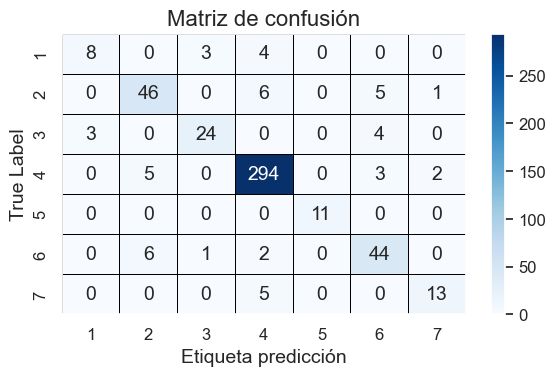

In [27]:
# Trazando la confusión matirx
class_names = np.unique(y_test)
sns.set(font_scale=1.2)  # tamaño de fuente 
plt.figure(figsize=(6, 4))  # tamaño de gráfico 

ax = sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                 annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")

# Dibujar bordes alrededor de la trama
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

# Establecer etiquetas de eje y título
ax.set_title("Matriz de confusión", fontsize=16)
ax.set_xlabel("Etiqueta predicción", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)

# Establecer etiquetas del eje x e y
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)

# Añadir una barra de colores
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)

# Mostrar la trama
plt.tight_layout()
plt.show()

# Clasificación usando el modelo KNN

In [28]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

In [29]:
# Entrenar datos con el modelo KNN
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_model = KNeighborsClassifier()

# Definir los parámetros para n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9]}

In [31]:
# Realice búsqueda utilizando cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [32]:
# Obtenga el modelo
best_model = grid_search.best_estimator_

In [33]:
# Obtener predicciones para el modelo
predict_knn = best_model.predict(X_test)
print(predict_knn)

[3 4 4 4 4 4 4 1 4 4 7 1 4 3 7 4 4 4 4 4 4 4 2 4 7 4 4 4 1 4 4 2 2 2 2 4 4
 4 4 4 4 2 4 4 4 4 4 4 4 6 5 7 4 4 4 4 5 5 4 4 4 4 4 4 5 1 4 4 4 4 4 6 4 4
 4 2 4 3 4 4 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4
 3 4 4 4 4 4 7 4 4 4 4 4 4 4 2 4 7 7 7 5 4 4 4 4 3 4 4 4 5 4 4 4 2 4 2 4 4
 4 4 4 4 4 7 4 4 4 4 4 4 4 7 4 2 4 4 3 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 4 4 2 4 4 3 4 4 4 7 4 4 4 4 2 4 4 5 2 3 2 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 7
 4 2 2 4 4 4 7 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4 4 7 4 4 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 2 4 4 4 4 4 4 4 1 4 4 4 2 4 4 6 6
 3 5 4 4 4 6 4 4 4 4 4 3 4 4 2 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 2 7 2 4 5 4 4 4 4 4 4 7 4 4 2 3 4 4 4 4 7 5 4 4 4 7 4 4 2 2 2 4 2 3 7 4 4
 4 4 4 2 4 4 4 4 4 2 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4
 1 4 4 4 7 4 7 2 4 2 4 4 4 4 2 4 2 7 4 5 4 4 4 4 4 4 4 4 4 4 7 4 4 4 4 4 5
 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 3 4 2 2 4 3 6 4 2 4 4 7 4 5 4 4 4 2 4
 4 4 4 4 4 4 4 4 4]


In [34]:

# Calcular matriz de confusión
knn_cnf_matrix = confusion_matrix(y_test, predict_knn)
print(knn_cnf_matrix)

[[  3   0   0  10   0   1   1]
 [  0  22   1  28   0   0   7]
 [  3   9  14   4   0   1   0]
 [  0   1   0 293   3   0   7]
 [  0   0   0   0  11   0   0]
 [  1  25   0  21   0   4   2]
 [  0   1   0  10   0   0   7]]


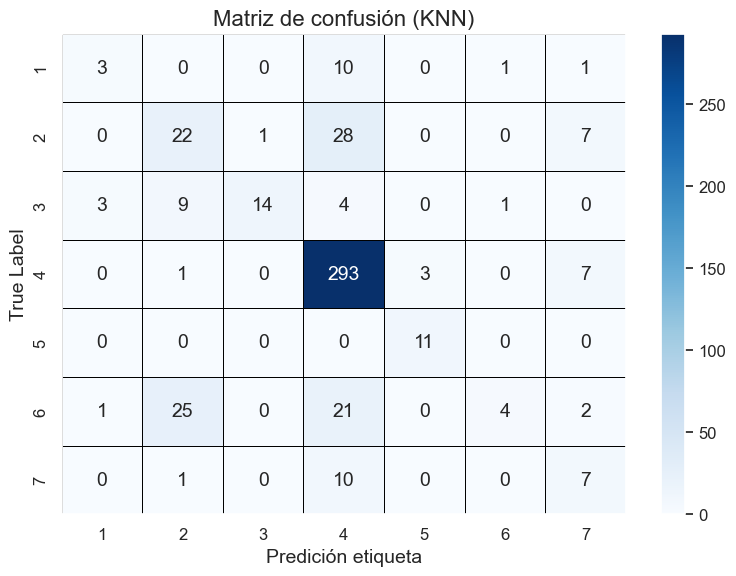

In [35]:
# Matriz de confusión con Seaborn
class_names = np.unique(y_test)
sns.set(font_scale=1.2)  # tamaño de fuente 
plt.figure(figsize=(8, 6))  # Tamaño de gráfico

ax = sns.heatmap(knn_cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                 annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")

ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

# Etiqueta y titulo
ax.set_title("Matriz de confusión (KNN)", fontsize=16)
ax.set_xlabel("Predición etiqueta", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)

ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)

cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)

# Mostrar gráfico de matriz
plt.tight_layout()
plt.show()
